## 피파 온라인4 선수 분석

### 패키지 설치 및 데이터 불러오기

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

df = pd.read_excel('player_data_fifa_online.xlsx')

### 한글 깨짐 현상 해결

In [214]:
import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm
    #fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [215]:
df.head()

,class,name,position,overall,birth,height,weight,physical,skill,foot,...,GK 핸들링,GK 킥,GK 반응속도,GK 위치선정,클래스_이름_포지션_오버롤,오버롤_다이빙,오버롤_핸들링,오버롤_킥,오버롤_반응속도,오버롤_위치선정
0,19,티아구 실바,CB,96,1984.09.22 (39세),183cm,79kg,보통,★★☆☆☆☆,L3 – R5,...,19,12,17,16,19_티아구 실바_CB_96,NaN,NaN,NaN,NaN,NaN
1,19,아스필리쿠에타,RB,90,1989.08.28 (34세),178cm,77kg,보통,★★☆☆☆☆,L3 – R5,...,9,10,5,6,19_아스필리쿠에타_RB_90,NaN,NaN,NaN,NaN,NaN
2,19,마르코스 알론소,LB,87,1990.12.28 (33세),188cm,85kg,마름,★★★☆☆☆,L5 – R3,...,7,13,12,9,19_마르코스 알론소_LB_87,NaN,NaN,NaN,NaN,NaN
3,19,로스 바클리,CAM,74,1993.12.05 (30세),186cm,87kg,보통,★★★★☆☆,L5 – R5,...,14,12,10,6,19_로스 바클리_CAM_74,NaN,NaN,NaN,NaN,NaN
4,19,안토니오 뤼디거,CB,81,1993.03.03 (30세),190cm,85kg,마름,★★☆☆☆☆,L3 – R5,...,15,10,8,12,19_안토니오 뤼디거_CB_81,NaN,NaN,NaN,NaN,NaN


### Hexagon Analysis

방사형 그래프를 활용하여 각 포지션에 적합한 선수인지 스텟 밸런스를 시각화 해봅시다.

In [251]:
forward = pd.Series(['ST', 'LW', 'RW', 'CF'])
midfielder = pd.Series(['CM', 'CAM', 'CDM', 'LM', 'RM'])
defender = pd.Series(['CB', 'RB', 'LB', 'RWB', 'LWB'])
goalkeeper = pd.Series(['GK'])

df_21_fw = pd.DataFrame()
df_21_mf = pd.DataFrame()
df_21_df = pd.DataFrame()
df_21_gk = pd.DataFrame()
df_20_fw = pd.DataFrame()
df_20_mf = pd.DataFrame()
df_20_df = pd.DataFrame()
df_20_gk = pd.DataFrame()
df_19_fw = pd.DataFrame()
df_19_mf = pd.DataFrame()
df_19_df = pd.DataFrame()
df_19_gk = pd.DataFrame()

for i in range(len(df)):
    player = pd.DataFrame({
        '이름': df.iloc[i]['name'],
        '스피드': df.iloc[i]['오버롤_스피드'],
        '슛': df.iloc[i]['오버롤_슛'],
        '패스': df.iloc[i]['오버롤_패스'],
        '드리블': df.iloc[i]['오버롤_드리블'],
        '수비': df.iloc[i]['오버롤_수비'],
        '피지컬': df.iloc[i]['오버롤_피지컬'],
    }, index = [i])
    keeper = pd.DataFrame({
        '이름': df.iloc[i]['name'],
        '다이빙': df.iloc[i]['오버롤_다이빙'],
        '핸들링': df.iloc[i]['오버롤_핸들링'],
        '킥': df.iloc[i]['오버롤_킥'],
        '반응속도': df.iloc[i]['오버롤_반응속도'],
        '스피드': df.iloc[i]['오버롤_스피드'],
        '위치선정': df.iloc[i]['오버롤_위치선정'],
    }, index = [i])

    if df['position'].isin(forward)[i] and df.iloc[i]['class'] == 21:
        df_21_fw = df_21_fw.append(player)
    elif df['position'].isin(midfielder)[i] and df.iloc[i]['class'] == 21:
        df_21_mf = df_21_mf.append(player)
    elif df['position'].isin(defender)[i] and df.iloc[i]['class'] == 21:
        df_21_df = df_21_df.append(player)
    elif df['position'].isin(goalkeeper)[i] and df.iloc[i]['class'] == 21:
        df_21_gk = df_21_gk.append(keeper)
    elif df['position'].isin(forward)[i] and df.iloc[i]['class'] == 20:
        df_20_fw = df_20_fw.append(player)
    elif df['position'].isin(midfielder)[i] and df.iloc[i]['class'] == 20:
        df_20_mf = df_20_mf.append(player)
    elif df['position'].isin(defender)[i] and df.iloc[i]['class'] == 20:
        df_20_df = df_20_df.append(player)
    elif df['position'].isin(goalkeeper)[i] and df.iloc[i]['class'] == 20:
        df_20_gk = df_20_gk.append(keeper)
    elif df['position'].isin(forward)[i] and df.iloc[i]['class'] == 19:
        df_19_fw = df_19_fw.append(player)
    elif df['position'].isin(midfielder)[i] and df.iloc[i]['class'] == 19:
        df_19_mf = df_19_mf.append(player)
    elif df['position'].isin(defender)[i] and df.iloc[i]['class'] == 19:
        df_19_df = df_19_df.append(player)
    elif df['position'].isin(goalkeeper)[i] and df.iloc[i]['class'] == 19:
        df_19_gk = df_19_gk.append(keeper)
    else:
        print(str(df['position'].isin(goalkeeper)[i]) + str(df.iloc[i]['class'] == 21))

df_21_fw.reset_index(drop=False, inplace=True)
df_21_mf.reset_index(drop=False, inplace=True)
df_21_df.reset_index(drop=False, inplace=True)
df_21_gk.reset_index(drop=False, inplace=True)
df_20_fw.reset_index(drop=False, inplace=True)
df_20_mf.reset_index(drop=False, inplace=True)
df_20_df.reset_index(drop=False, inplace=True)
df_20_gk.reset_index(drop=False, inplace=True)
df_19_fw.reset_index(drop=False, inplace=True)
df_19_mf.reset_index(drop=False, inplace=True)
df_19_df.reset_index(drop=False, inplace=True)
df_19_gk.reset_index(drop=False, inplace=True)

In [245]:
df_21_fw.head()

,이름,스피드,슛,패스,드리블,수비,피지컬
37,로멜루 루카쿠,95,98.0,80.0,88.0,43.0,98.0
46,티모 베르너,105,100.0,81.0,93.0,38.0,88.0
50,크리스천 풀리식,99,79.0,84.0,94.0,57.0,67.0
56,카이 하베르츠,98,93.0,89.0,95.0,67.0,89.0
58,C. 허드슨-오도이,103,87.0,90.0,98.0,74.0,85.0


In [218]:
df_21_mf.head()

,이름,스피드,슛,패스,드리블,수비,피지컬
39,로스 바클리,88,80.0,83.0,88.0,66.0,87.0
42,조르지뉴,78,71.0,97.0,92.0,87.0,84.0
44,사울,91,82.0,89.0,93.0,90.0,92.0
45,하킴 지예시,96,95.0,99.0,98.0,70.0,78.0
48,루벤 로프터스-칙,91,87.0,94.0,99.0,81.0,98.0


In [219]:
df_21_df.head()

,이름,스피드,슛,패스,드리블,수비,피지컬
35,티아구 실바,93,73.0,94.0,93.0,100.0,96.0
36,아스필리쿠에타,92,69.0,90.0,90.0,97.0,93.0
38,마르코스 알론소,83,84.0,93.0,90.0,91.0,95.0
41,안토니오 뤼디거,104,69.0,83.0,88.0,100.0,102.0
47,A. 크리스텐센,97,71.0,85.0,86.0,99.0,96.0


In [220]:
df_21_gk.head()

,이름,다이빙,핸들링,킥,반응속도,스피드,위치선정
40,M. 베티넬리,70.0,67.0,73.0,73.0,28,73.0
43,케파,79.0,76.0,83.0,83.0,42,74.0
54,에두아르 멘디,101.0,98.0,89.0,104.0,54,101.0


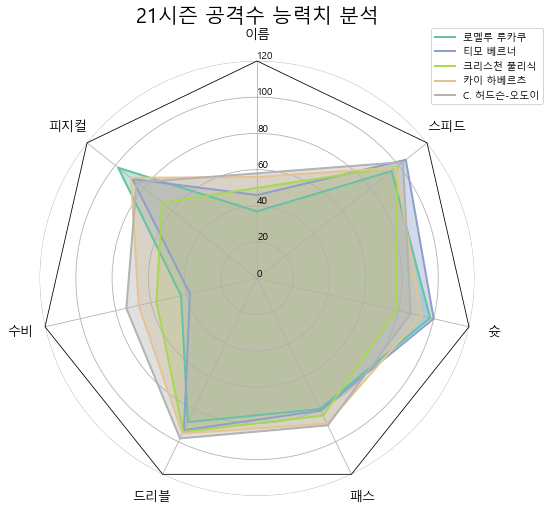

In [291]:
labels = df_21_fw.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점 추가

my_palette = plt.cm.get_cmap("Set2", len(df_21_fw.index))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df_21_fw.iterrows():
    color = my_palette(i)
    data = df_21_fw.iloc[i].drop('이름').tolist()
    data += data[:1]

    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 시계방향으로 그리기

    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,20,40,60,80,100,120],['0','20','40','60','80','100','120'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,120)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.이름)
    ax.fill(angles, data, color=color, alpha=0.4)

for g in ax.yaxis.get_gridlines():
    g.get_path()._interpolation_steps = len(labels)

spine = Spine(axes=ax,
              spine_type='circle',
              path=Path.unit_regular_polygon(len(labels)))

spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
ax.spines = {'polar':spine}

plt.title('21시즌 공격수 능력치 분석', position=(0.5, 1.0), fontsize=20)
plt.legend(loc=(0.9,0.9))
plt.show()